<a href="https://colab.research.google.com/github/thual/POM-ch6-ondesElectriques/blob/main/ondesElectriques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ondes électriques amorties dans un coaxial

Activité : changez les paramètres des animations des ondes sonores !

**Contexte :**

Les oscillations du courant $I(x,t)$ dans un cable coaxial obéissent à l'équation des ondes 1D amorties :
$${\partial^2 I \over \partial t^2} (x,t)  + 2 \mu {\partial I \over \partial t}= c^2 \, {\partial^2 I \over \partial x^2} (x,t)\;.$$

Cette équation a pour solutions des ondes monochromatiques progressives amorties au cours du temps:
$$ I(x,t) = A e^{-\mu t} \, \cos(k x -\omega_* t)\;,$$
avec $\omega_* = \sqrt{k^2 c^2 - \mu^2}$. 

Elle admet également comme solutions des ondes  monochromatiques progressives amorties le long de l'axe, dans le sens de propagation :
$$ I(x,t) = A_- e^{-\gamma x} \cos(k x -\omega t)\; \hbox{et} \; I(x,t) = A_+ e^{\gamma x} \cos(k x +\omega t) \;,$$
avec $\omega = k c$ et $\gamma = \mu/c$. 

Ces différentes solutions sont visualisées ici. 




# Onde progressive monochromatique amortie au cours du temps

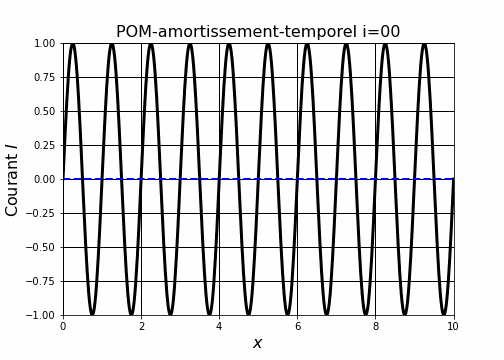

# Onde progressive monochromatique amortie le long de l'axe
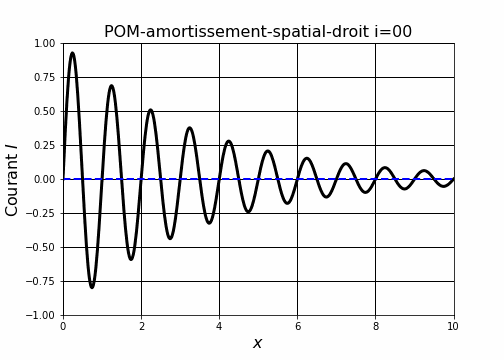
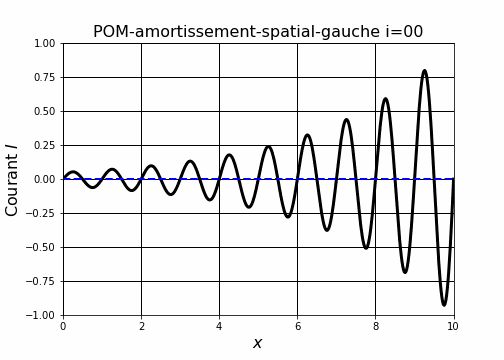

# Première partie du programme

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme ! 
*   Colab : ⌘/Ctrl+F9 pour tout exécuter.
*   MyBinder : -> Run -> "Run all cells"


In [14]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

print("Ondes electriques")
# Petits outils

def zfi(x,le=2):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

def spirale():
    name="POM-amortissement-en-un-point"
    ti=np.linspace(0,Time,501);
    I=np.exp(-mu*ti)*np.sin(-omega*ti)
    dIdt=-np.exp(-mu*ti)*np.cos(-omega*ti)
    plt.figure(1,figsize=(7,7))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    titlefig=name
    plt.title(titlefig,fontsize=16)
    title=name
    print(" ")   
    print("==================================")
    print(title) 
    print("==================================")
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.plot(I,dIdt,color='blue',linewidth=3)
    plt.savefig(name)
    plt.show()

# Animations d'ondes
# ================================================

def AniProgTemp(): 
    # Onde progressive amortissement temporel
    global Time, name
    global signal,ymin,ymax    
    global fram
    print(" ")   
    print("==================================")
    name="POM-amortissement-temporel"
    print(name)
    ymin=-1; ymax=1;
    omegas=np.sqrt((k*c)**2-mu**2)
    # signal 
    def signal(a,t):
        xi=np.sin(k*a-omegas*t)*np.exp(-mu*t)
        return xi   
    # 
    fram=np.arange(0,Nt)
    ani=Gifanim(anisimple)      
    return ani

def AniProgSpaG(): 
    # Onde progressive amortissement gauche temporel 
    global Time, name
    global signal,ymin,ymax    
    global fram
    name="POM-amortissement-spatial-gauche"
    print(name)
    ymin=-1; ymax=1;
    # signal 
    def signal(a,t):
        xi=np.sin(k*a+omega*t)*np.exp(-ga*(L-a))
        return xi
    # 
    fram=np.arange(0,Nt)
    ani=Gifanim(anisimple)      
    return ani

def AniProgSpaD(): 
    # Onde progressive amortissement gauche temporel 
    global Time, name
    global signal,ymin,ymax    
    global fram
    name="POM-amortissement-spatial-droit"
    print(name)
    ymin=-1; ymax=1;
    # signal 
    def signal(a,t):
        xi=np.sin(k*a-omega*t)*np.exp(-ga*a)
        return xi
    # 
    fram=np.arange(0,Nt)
    ani=Gifanim(anisimple)      
    return ani

# Fonction d'animations appelées par FuncAnimation
# ================================================

def anisimple(i):
    # Animation simple
    global Time, name
    global signal, ymin, ymax 
    acont=np.linspace(0,L,Na);
    dt=Time/Nt
    # signal
    t=dt*i;
    xicont=signal(acont,t)
    # Figure 
    ax.clear()
    ax.plot(acont,xicont,color='black',linewidth=3)
    title=name+" i="+zfi(i)
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'Courant $I$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.plot([0,L],[0,0],'b--',linewidth=2)
    # Sauver toutes les figures
    if FlagSavext: 
        namei=name+zfi(i)+ext;
        fig.savefig(namei)
          

# Fonction Gifanim
# ================

def Gifanim(anifunc):
    global inter, fram
    ani=FuncAnimation(fig,anifunc,frames=fram,interval=inter,repeat=True)
    namegif=name+".gif"
    print(" ")   
    print("Simulation pour créer un gif animé")  
    ani.save(namegif,writer="pillow")
    print("   Gif animé créé :",namegif)
    # Visualisation animée de la simulation 
    print("Simulation pour visualiser l'animation")
    print("==================================")
    plt.close() 
    plt.rc('animation', html='jshtml')
    return ani



Ondes electriques


# Paramètres du programme

*(Colab : Cliquez sur le triangle à gauche de titre pour visualiser le code et changer les paramètres !)*

NB : les types d'ondes non activés sont lancés dans des lignes de commandes séparées, à la fin du programme.

**Paramètres principaux**
* `mu` : Paramètre de dissipation  (.3)
* `n` : Nombre de longueurs d'ondes  (20)
* `nT` : Nombre de périodes simulées  (7)

**Paramètres communs aux types d'ondes**
* `Nt` : Nombre d'images par les animations temporelles (20)
* `FlagSavext` : Sauver les  des fichiers
* `ext`: Extension des fichiers à sauver (.png, .pdf, .jpg, etc.)

**Tracé du signal en un point**
* `FlagSpirale` : Signal amorti en un point

**Types d'ondes**
* `FlagAniProgTemp` : Onde amortie temporellement
* `FlagAniProgSpaG` : Onde à gauche amortie le long de l'axe 
* `FlagAniProgSpaD` : Onde à droite amortie le long de l'axe 

*Exécutez le code ci-dessous (Colab : cliquez sur "1 cellule masquée" pour changer les paramètres) !*

 
POM-amortissement-en-un-point


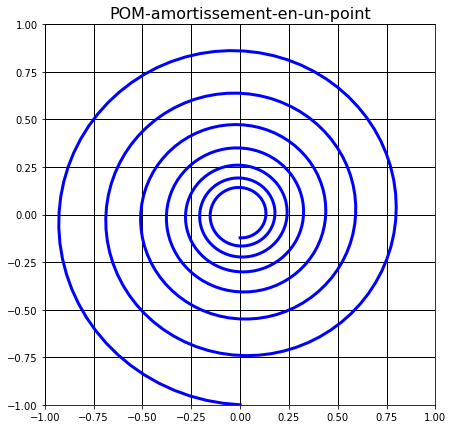

 
POM-amortissement-temporel
 
Simulation pour créer un gif animé
   Gif animé créé : POM-amortissement-temporel.gif
Simulation pour visualiser l'animation
POM-amortissement-spatial-gauche
 
Simulation pour créer un gif animé
   Gif animé créé : POM-amortissement-spatial-gauche.gif
Simulation pour visualiser l'animation


In [15]:
F=False; T=True

# Figures diverses
FlagSpirale=T
    
# Choix de l'animation 
## Affichage en ligne de la dernière uniquement
FlagAniProgTemp=T
FlagAniProgSpaG=T
FlagAniProgSpaD=F

# Paramètres principaux
mu=.3 # Dissipation
n=20  # Nombre d'ondes
nT=7 # Nombre de periodes simulees

# Paramètres pouvant être changés
Nt=20 # Nombre d'images pour l'animation
Nn=10 # Nombre de valeurs pour n variable
ext=".png"
FlagSavext=F # Création de fichier ext pour chaque image


# Paramètres qu'il n'est pas utile de changer
Na=501; # Nombre de points pour le tracé
L=10; # Longueur de l'intervalle
c=1; # Vitesse des ondes
inter=300; # millisecondes animation par défaut

# Paramètres dérivés 
k=n*np.pi/L;  omega=k*c; ga=mu/c
Time=nT*2*np.pi/omega 

 # Spirale
if FlagSpirale: spirale() 

# Animations
global name
# Figure preparation 
fig=plt.figure(1,figsize=(7,5))
ax=plt.subplot(1,1,1)
# Choix de l'animation
if FlagAniProgTemp: ani=AniProgTemp()
if FlagAniProgSpaG: ani=AniProgSpaG()
if FlagAniProgSpaD: ani=AniProgSpaD()

# Animation 
# Cette commande doit rester la dernière pour être suivie d'effet
ani


# Autres animations

In [16]:
AniProgSpaD()

POM-amortissement-spatial-droit
 
Simulation pour créer un gif animé
   Gif animé créé : POM-amortissement-spatial-droit.gif
Simulation pour visualiser l'animation
